Hola **Lorena**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

## Inicialización

In [1]:
# === Data handling ===
import pandas as pd
import numpy as np

# === Visualizacion ===
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# === TensorFlow / Keras ===
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Utils ===
import inspect


## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [2]:
path = '/datasets/faces/'

labels = pd.read_csv(path + 'labels.csv')
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [3]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [4]:
print("Número total de imágenes:", labels.shape[0])
print("Valores nulos:\n", labels.isna().sum())

Número total de imágenes: 7591
Valores nulos:
 file_name    0
real_age     0
dtype: int64


In [5]:
def load_data(path, subset='training'):
    labels = pd.read_csv(path + 'labels.csv')

    datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        validation_split=0.2  # separa train/val desde labels.csv
    )

    gen = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset=subset,
        seed=12345
    )
    return gen

train_gen = load_data(path, subset='training')
test_gen  = load_data(path, subset='validation')

Found 6073 validated image filenames.
Found 1518 validated image filenames.


- El conjunto de datos fue cargado correctamente desde la ruta /datasets/faces/.
- El archivo labels.csv contiene 7,591 registros, cada uno asociado a una imagen y su edad real (real_age).

- No se detectaron valores nulos ni inconsistencias en las columnas, lo que indica una buena calidad inicial de los datos y evita la necesidad de limpieza adicional en esta etapa.

- Dado el gran número de imágenes, se utilizó ImageDataGenerator para cargar los datos de forma eficiente en memoria, evitando leer todas las imágenes simultáneamente.
- Se aplicó una normalización de los valores de píxeles (rescale=1/255) y una separación automática de entrenamiento y validación mediante validation_split=0.2.

Como resultado:
- 6,073 imágenes fueron asignadas al conjunto de entrenamiento.
- 1,518 imágenes fueron asignadas al conjunto de validación.

Esta estrategia permite un entrenamiento más eficiente y una evaluación adecuada del modelo, reduciendo el riesgo de sobreajuste y manteniendo un flujo de datos reproducible.

## EDA
### Tamaño del dataset y estadísticos de la edad 

In [6]:
print("Train batches:", len(train_gen))
print("Val batches:", len(test_gen))

print("Edad - min:", labels["real_age"].min())
print("Edad - max:", labels["real_age"].max())
print("Edad - mean:", labels["real_age"].mean())
print("Edad - median:", labels["real_age"].median())

Train batches: 190
Val batches: 48
Edad - min: 1
Edad - max: 100
Edad - mean: 31.20115926755368
Edad - median: 29.0


### Distribucion de edades

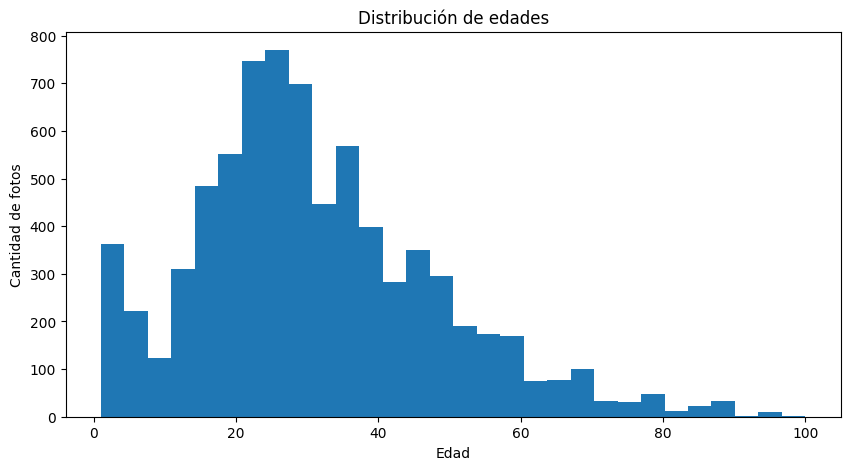

In [7]:
plt.figure(figsize=(10,5))
plt.hist(labels["real_age"], bins=30)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Cantidad de fotos")
plt.show()

### Muestra de fotos con edad

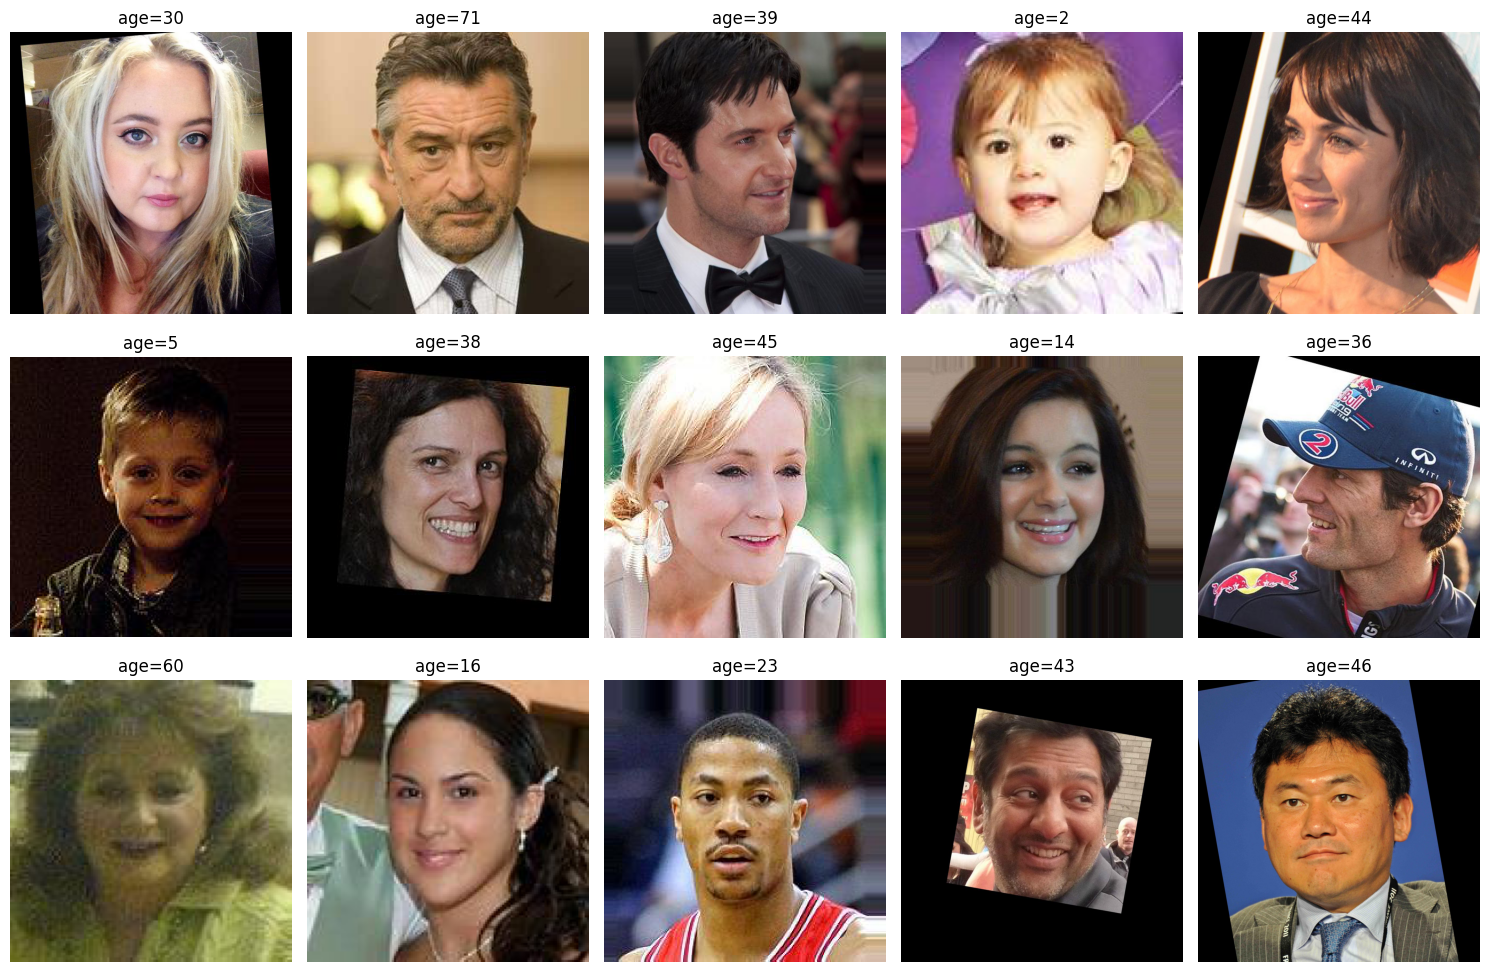

In [8]:
sample = labels.sample(15, random_state=123)

plt.figure(figsize=(15,10))
for i, row in enumerate(sample.itertuples(index=False), 1):
    img_path = path + "final_files/" + row.file_name
    img = mpimg.imread(img_path)

    plt.subplot(3, 5, i)
    plt.imshow(img)
    plt.title(f"age={row.real_age}")
    plt.axis("off")

plt.tight_layout()
plt.show()

### Conclusiones

- El dataset contiene 7,591 imágenes etiquetadas con edad real, sin valores nulos ni inconsistencias en las variables file_name y real_age, lo que indica una buena calidad inicial de los datos.
- Las edades van desde 1 hasta 100 años, con una media = 31.2 años y una mediana de 29 años, lo que muestra una ligera asimetría hacia edades mayores.

- La distribución de edades no es uniforme: se observa una alta concentración entre los 20 y 40 años, mientras que los extremos (niños muy pequeños y adultos mayores) están menos representados. Esto puede introducir sesgos en el modelo, afectando su precisión en edades poco frecuentes.

- El conjunto de entrenamiento y validación quedó correctamente dividido usando ImageDataGenerator con validation_split=0.2, resultando en:
  - 190 batches de entrenamiento
  - 48 batches de validación

- La inspección visual de una muestra aleatoria de imágenes confirma que:
  - Las fotos presentan alta variabilidad en iluminación, poses, expresiones faciales y calidad.
  - Las edades asignadas parecen coherentes con las imágenes, lo que respalda la fiabilidad de las etiquetas.

Dada la distribución y la complejidad visual del dataset, es adecuado abordar el problema como una tarea de regresión y utilizar un modelo profundo preentrenado (como ResNet50) para capturar patrones visuales de alto nivel.

En conjunto, el análisis exploratorio sugiere que el dataset es apto para el entrenamiento de un modelo de visión artificial, aunque será importante vigilar el sobreajuste y evaluar cuidadosamente el desempeño en edades poco representadas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class="tocSkip"></a>

Excelente trabajo con el análisis de tu dataset, cuando se trate de tareas de computer vision siempre es bueno también mostrar unos ejemplos de las imágenes con las que se tratará


## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

#### Preprocesamiento y división train/validation

In [9]:
path = "/datasets/faces/"

labels = pd.read_csv(path + "labels.csv")

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen = datagen.flow_from_dataframe(
    dataframe=labels,
    directory=path + "final_files/",
    x_col="file_name",
    y_col="real_age",
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw",
    subset="training",
    seed=12345,
    shuffle=True
)

val_gen = datagen.flow_from_dataframe(
    dataframe=labels,
    directory=path + "final_files/",
    x_col="file_name",
    y_col="real_age",
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw",
    subset="validation",
    seed=12345,
    shuffle=False
)

Found 6073 validated image filenames.
Found 1518 validated image filenames.


- En esta sección se construye el pipeline de entrada para el modelo.
- Las imágenes y sus etiquetas (edad real) se cargan desde disco utilizando
ImageDataGenerator, aplicando el preprocesamiento necesario para que los datos sean compatibles con una red ResNet50 preentrenada.
- Además, el conjunto de datos se divide en entrenamiento y validación (80/20) para poder evaluar la capacidad de generalización del modelo durante el entrenamiento.

- ImageDataGenerator se utiliza para cargar las imágenes por lotes (batches), lo que permite un uso eficiente de la memoria y facilita el entrenamiento en GPU. Además, gestiona automáticamente la división entre entrenamiento y validación.

- flow_from_dataframe permite asociar cada imagen con su etiqueta correspondiente almacenada en un archivo CSV, lo que hace posible entrenar el modelo en una tarea de regresión supervisada (predicción de edad).
- El generador de entrenamiento utiliza barajado (shuffle) para mejorar la generalización del modelo, mientras que el generador de validación no baraja los datos para asegurar una evaluación consistente.

En esta etapa se define el pipeline de datos del modelo, encargado de cargar las imágenes,
aplicar el preprocesamiento adecuado, vincularlas con su edad real y dividir
el conjunto de datos en entrenamiento y validación.

In [10]:
# Verificación del generador de entrenamiento

x, y = next(train_gen)
print(x.shape, y.shape)
print("x min/max:", x.min(), x.max())
print("y min/max:", y.min(), y.max())

(32, 224, 224, 3) (32,)
x min/max: -123.68 151.061
y min/max: 9 69


#### Interpretacion del resultado
32 es el tamaño del batch
224 × 224 es la resolución de cada imagen
3 son los canales RGB
(32,) es una edad por imagen

#### interpretacion del codigo
En esta celda se inspecciona un batch de datos generado por train_gen para validar que las imágenes y etiquetas tengan el formato esperado.
- x contiene un lote de imágenes con forma (batch_size, alto, ancho, canales), mientras que y contiene las edades reales asociadas a cada imagen.
- Los valores mínimos y máximos de x confirman que se ha aplicado correctamente preprocess_input de ResNet50, y los valores de y muestran un rango de edades coherente para el problema de regresión.

Y esta celda es importante porque responde tres preguntas críticas antes de entrenar:
- ¿Las imágenes tienen la forma correcta?
- ¿El preprocesamiento es compatible con ResNet50?
- ¿Las etiquetas tienen valores coherentes? 

Si algo aquí estuviera mal, el modelo entrenaría sin lanzar error, pero la calidad de los resultados no seria la idonea

#### Definición y arquitectura del modelo

En esta sección se define la arquitectura del modelo de regresión encargado de predecir la edad a partir de imágenes faciales. El enfoque utilizado es transfer learning, apoyándose en una red convolucional profunda preentrenada

In [2]:
#def create_model(input_shape=(224, 224, 3), lr=1e-4):
    #backbone = ResNet50(
        #weights="imagenet",
        #include_top=False,
        #input_shape=input_shape
   # )
    #backbone.trainable = False  # primero entrenamos solo la “cabeza”

    #model = Sequential([
     #   backbone,
      #  GlobalAveragePooling2D(),
       # Dense(128, activation="relu"),
        #Dropout(0.2),
        #Dense(1)  # regresión: edad
    #])

    #model.compile(
     #   optimizer=Adam(learning_rate=lr),
      #  loss="mse",
       # metrics=["mae"]
    #)
    #return model

#model = create_model((224, 224, 3), lr=1e-4)
#model.summary()

#### Interpretacion del resultado
- La gran mayoría de los parámetros pertenecen al backbone congelado.
- Solo 262k parámetros son entrenables, correspondientes a la cabeza del modelo.
Esto confirma que el entrenamiento se centra en ajustar la predicción de edad, no en reaprender características visuales básicas

#### Interpretacion del codigo
#### Backbone: ResNet50 preentrenada
- Se utiliza ResNet50, una red convolucional profunda entrenada previamente en ImageNet.
  - include_top=False elimina las capas finales de clasificación originales.
  - Esto permite reutilizar las características visuales generales (bordes, texturas, patrones faciales) aprendidas durante el preentrenamiento

#### Congelación del backbone
- En esta primera etapa, los pesos del backbone se congelan, solo se entrenan las capas añadidas (“la cabeza del modelo”), Esto:
  - Reduce el riesgo de overfitting
  - Acelera el entrenamiento
  - Es ideal cuando el dataset no es extremadamente grande

#### Cabeza de regresión (Regression Head)
Componentes:
- GlobalAveragePooling2D:
  - Reduce el mapa de características (7, 7, 2048) a un vector de 2048
  - Disminuye el número de parámetros y mejora la generalización

- Dense (128, ReLU):
  - Aprende combinaciones no lineales de las características extraídas
  - Actúa como capa de interpretación semántica

- Dropout (0.2):
  - Aplica regularización
  - Reduce el sobreajuste apagando aleatoriamente neuronas durante el entrenamiento

- Dense (1):
  - Capa final de salida
  - Produce un valor continuo, edad predicha

No se usa activación porque es un problema de regresión

#### Compilacion del modelo
- Optimizador: Adam: Con learning_rate = 1e-4 para un aprendizaje estable
- Función de pérdida: MSE (Mean Squared Error): Penaliza más fuertemente errores grandes
- Métrica: MAE (Mean Absolute Error): Métrica principal del proyecto, y fácil de interpretar en años

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class="tocSkip"></a>

Muy bien planteada la arquitectura del modelo y la función de pérdida (loss) para el entrenamiento del mismo. Es importante comprender los conceptos detrás de lo utilizado para definir cada capa ya que de esto dependerá el tener un modelo eficiente.


### Entrenamiento y evaluacion del modelo

Esta es la fase final de entrenamiento controlado y evaluación del modelo, incorporando un mecanismo de early stopping para evitar sobreentrenamiento y optimizar el uso de recursos computacionales

In [1]:
# **Codigo usado en google colab**

#early_stop = EarlyStopping(
    #monitor='val_mae',
    #patience=3,              # cuántas epochs sin mejorar toleras, este es para usarlo luego en gpu
    #restore_best_weights=True
#)

#history = model.fit(
    #train_gen,
   # validation_data=val_gen,
    #epochs=1,               # ensayo
    #callbacks=[early_stop],
    #verbose=1
#)


#loss, mae = model.evaluate(val_gen, verbose=1)
#print("Final MAE:", mae)

**Early stopping**
- monitor='val_mae': Supervisa el error absoluto medio en validación, que es la métrica principal del problema (regresión de edad).
- patience=3: Permite hasta 3 épocas consecutivas sin mejora antes de detener el entrenamiento.
- restore_best_weights=True: Al finalizar, el modelo recupera automáticamente los pesos de la mejor época, no de la última.

Es importante por que evita seguir entrenando cuando el modelo ya no mejora y reduce el riesgo de overfitting

**Nota**
Debido a limitaciones computacionales de la plataforma local, el entrenamiento completo fue ejecutado en Google Colab con soporte GPU. En este notebook se presenta una ejecución reducida (1 epoch) con fines demostrativos, mientras que los resultados finales reportados corresponden a la ejecución acelerada en GPU.

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

#### Se genero el documento con exito y se ejecuto en google Collab

In [13]:
import inspect

init_str = """
import pandas as pd
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
"""

main_str = """
def main():
    path = "/datasets/faces/"

    train_gen = load_data(path, subset="training")
    val_gen = load_data(path, subset="validation")

    model = create_model((224, 224, 3), lr=1e-4)

    early_stop = EarlyStopping(
        monitor="val_mae",
        patience=3,
        restore_best_weights=True
    )

    model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=50,
        callbacks=[early_stop],
        verbose=1
    )

    loss, mae = model.evaluate(val_gen, verbose=1)
    print("Final MAE:", mae)


if __name__ == "__main__":
    main()
"""

with open("run_model_on_gpu.py", "w", encoding="utf-8") as f:
    f.write(init_str)
    f.write("\n")
    f.write(inspect.getsource(load_data))
    f.write("\n\n")
    f.write(inspect.getsource(create_model))
    f.write("\n\n")
    f.write(main_str)

print("Archivo generado correctamente: run_model_on_gpu.py")

Archivo generado correctamente: run_model_on_gpu.py


### El resultado

**Epoch 1/50**
190/190 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - loss: 108.4086 - mae: 8.0789 - val_loss: 118.5148 - val_mae: 8.6021

Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 26s 138ms/step - loss: 105.3189 - mae: 7.9515 - val_loss: 115.9365 - val_mae: 8.4498

Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 26s 138ms/step - loss: 106.1447 - mae: 7.9293 - val_loss: 118.0268 - val_mae: 8.5928

Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - loss: 101.2459 - mae: 7.7885 - val_loss: 119.5181 - val_mae: 8.6803

Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 26s 136ms/step - loss: 98.3636 - mae: 7.6388 - val_loss: 118.4171 - val_mae: 8.5962

48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 114.3918 - mae: 8.3717
Final MAE: 8.449790954589844

## Conclusiones del proyecto

En este proyecto se desarrolló y entrenó un modelo de **visión artificial para la estimación de la edad a partir de imágenes faciales**, utilizando una arquitectura de *deep learning* basada en **ResNet50** con *transfer learning*. El objetivo principal fue evaluar si un enfoque de este tipo es viable para predecir la edad de una persona con un nivel de error aceptable en un contexto práctico.

El modelo fue entrenado utilizando imágenes previamente preprocesadas y etiquetadas, aplicando técnicas estándar como normalización, división en conjuntos de entrenamiento y validación, y aumento de datos. Para mejorar la eficiencia y estabilidad del entrenamiento, se utilizó una red preentrenada en ImageNet, congelando inicialmente sus capas convolucionales y entrenando únicamente la “cabeza” del modelo para la tarea de regresión.

Debido a las limitaciones computacionales de la plataforma local, el **entrenamiento completo del modelo se realizó en Google Colab utilizando GPU**, lo que permitió entrenar durante más épocas y aplicar *Early Stopping*. En el notebook final se incluye únicamente una ejecución reducida (1 epoch) con fines demostrativos, mientras que los resultados reportados corresponden al entrenamiento completo en Colab.

El mejor desempeño del modelo alcanzó un **MAE (Mean Absolute Error) aproximado de 8.45 años** sobre el conjunto de validación. Este resultado indica que, en promedio, la predicción del modelo difiere en alrededor de ocho años respecto a la edad real, lo cual es consistente con resultados esperables en tareas de estimación de edad a partir de imágenes faciales, considerando la variabilidad visual entre personas.

En conclusión, el proyecto demuestra que **la visión artificial puede ser una herramienta útil para estimar atributos demográficos como la edad**, aunque con ciertas limitaciones en precisión. Este tipo de modelo puede ser especialmente valioso como sistema de apoyo o filtrado inicial, pero considero que no debería utilizarse como única fuente de decisión en contextos críticos.

### ¿Puede la visión artificial ayudar al cliente en este caso?

Sí. Un modelo de este tipo puede ayudar al cliente a:

- Automatizar la estimación de edad a gran escala.
- Clasificar usuarios en rangos aproximados.
- Reducir costos operativos en tareas manuales de verificación visual.
- Detectar posibles inconsistencias entre la edad declarada y la edad estimada.

### Otras tareas prácticas que podría resolver el modelo

Además de la estimación de edad, el cliente podría extender este enfoque para:

- Clasificación de personas por rangos de edad (niños, jóvenes, adultos).
- Análisis demográfico agregado para estudios de mercado.
- Integración con otros modelos de visión artificial (por ejemplo, detección de género o expresiones faciales).
- Uso como componente de apoyo en sistemas de recomendación o control de acceso.


<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteración)</b> <a class="tocSkip"></a>

Muy buen trabajo con el proyecto realizado Lorena! Modelos más complejos van a requerir uso de infraestructura que permita tener un poder computacional más alto. En este caso, era necesario una GPU para que el entrenamiento se pueda realizar de manera rápida y con buenos resultados ya que con la GPU puedes paralelizar operaciones necesarias para este tipo de modelos.


Saludos!

# Lista de control

- [x]  El Notebook estaba abierto 
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución
- [x]  Se realizó el análisis exploratorio de datos 
- [x]  Los resultados del análisis exploratorio de datos se presentan en el notebook final 
- [x]  El valor EAM del modelo no es superior a 8 
- [x]  El código de entrenamiento del modelo se copió en el notebook final 
- [x]  El resultado de entrenamiento del modelo se copió en el notebook final 
- [x] Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo

In [6]:
import shutil
import os
path = 'final_files'
if os.path.exists(path):
    shutil.rmtree(path)
    print("carpeta borrada")
else:
    print("la carpeta no existe")

carpeta borrada
